In [37]:
set.seed(123)
###define a function to draw samples from a Dirichlet distribution
rDirichlet <- function(alpha_vec){
	num <- length(alpha_vec)
	temp <- rgamma(num, shape = alpha_vec, rate = 1)
	return(temp / sum(temp))
}

n <- 180     #number of samples 
n1 <- 60    #number of controls
n2 <- 120    #number of cases 

m <- 2000   #number of CpG sites
K <- 3       #underlying cell type number
	
###simulate methylation baseline profiles
#assume cell type 1 and cell type 2 are from the same lineage
#cell type 1
methy1 <- rbeta(m,3,6)
#cell type 2 
methy2 <- methy1 + rnorm(m, sd=0.01)
ind <- sample(1:m, m/5) 
methy2[ind] <- rbeta(length(ind),3,6)

#cell type 3
methy3 <- rbeta(m,3,6)
mu <- cbind(methy1, methy2, methy3)



#observed phenotype
p1=2
X=rbind(c(rep(0,n1),rep(1,n2)),runif(n,min=10,max=50))#(2,180),这两个性状一个是定性的，一个是定量的，下面也是
beta=array(0,dim=c(m,K,p1))

m_common <- 10
max_signal <- 0.15
min_signal <- 0.07

#we allow different signs and magnitudes
signs <- sample(c(-1,1), m_common*K, replace=TRUE)
beta[1:m_common,1:K,1] <- signs * runif(m_common*K, min=min_signal, max=max_signal)

m_seperate <- 10
signs <- sample(c(-1,1), m_seperate*2, replace=TRUE)
beta[m_common+(1:m_seperate),1:2,1] <- signs * 
					runif(m_seperate*2, min=min_signal, max=max_signal)

signs <- sample(c(-1,1), m_seperate, replace=TRUE)
beta[m_common+m_seperate+(1:m_seperate),K,1] <- signs * 
					runif(m_seperate, min=min_signal, max=max_signal)

#age
base <- 50
m_common <- 10
max_signal <- 0.015
min_signal <- 0.007
signs <- sample(c(-1,1), m_common*K, replace=TRUE)
beta[base+1:m_common,1:K,2] <- signs * 
					runif(m_common*K, min=min_signal, max=max_signal)

m_seperate <- 10
signs <- sample(c(-1,1), m_seperate*2, replace=TRUE)
beta[base+m_common+(1:m_seperate),1:2,2] <- signs * 
					runif(m_seperate*2, min=min_signal, max=max_signal)

signs <- sample(c(-1,1), m_seperate, replace=TRUE)
beta[base+m_common+m_seperate+(1:m_seperate),K,2] <- signs * 
					runif(m_seperate, min=min_signal, max=max_signal)















###generate the cellular compositions 
P <- sapply(1:n, function(i){
				if(X[1,i]==0){ #if control
					rDirichlet(c(4,4, 2+X[2,i]/10))
				}else{
					rDirichlet(c(4,4, 5+X[2,i]/10))
				}	
			})

###generate the observed methylation profiles 
Ometh <- NULL
for(i in 1:n){
	utmp <- t(sapply(1:m, function(j){
					tmp1 <- colSums(X[ ,i] * t(beta[j, , ]))
					rnorm(K,mean=mu[j, ]+tmp1,sd=0.01)
				}))
	tmp2 <- colSums(P[ ,i] * t(utmp))
	Ometh <- cbind(Ometh, tmp2 + rnorm(m, sd = 0.01))
}

#constrain methylation values between 0 and 1
Ometh[Ometh > 1] <- 1

Ometh[Ometh < 0] <- 0

## ----data-preparation2-----------------------------------------------------
#the class of the methylation matrix
class(Ometh)

#the values in the methylation matrix
head(Ometh[,1:6])

#the class of the covariate matrix
class(X)

#the values in the covariate matrix
X[ ,1:6]

## ----model1----------------------------------------------------------------


[1] "matrix"

0.2909732,0.3250748,0.3746402,0.2802173,0.3674263,0.3813111
0.2884468,0.2823117,0.3087597,0.2978464,0.3128187,0.2934819
0.5704537,0.5644074,0.5384074,0.6112050,0.5272176,0.5004729
0.3517885,0.3026490,0.3192236,0.3261329,0.3498188,0.2905791
0.3558526,0.3429035,0.3511955,0.3782821,0.3703957,0.3013093
0.3606192,0.3488377,0.3223230,0.4160842,0.3364454,0.3186609


[1] "matrix"

0.00000,0.00000,0.00000,0.0000,0.00000,0.00000
23.94774,42.26709,37.35212,17.2174,20.23533,38.89563


In [51]:
library(HIREewas)
ret_list <- HIRE(Ometh, X, num_celltype=K, tol=10^(-5), num_iter=50, alpha=0.01)





  Initialization Done.

  Implementing EM algorithm... 



Iteration: 1	 observed-data log likelihood: 784298.613136
Iteration: 2	 observed-data log likelihood: 842878.408853
Iteration: 3	 observed-data log likelihood: 887684.533579
Iteration: 4	 observed-data log likelihood: 925336.546910
Iteration: 5	 observed-data log likelihood: 957552.516807
Iteration: 6	 observed-data log likelihood: 984931.145645
Iteration: 7	 observed-data log likelihood: 1007763.723921
Iteration: 8	 observed-data log likelihood: 1026321.583850
Iteration: 9	 observed-data log likelihood: 1040968.095085
Iteration: 10	 observed-data log likelihood: 1052177.145534
Iteration: 11	 observed-data log likelihood: 1060518.262052
Iteration: 12	 observed-data log likelihood: 1066576.776503
Iteration: 13	 observed-data log likelihood: 1070897.420527
Iteration: 14	 observed-data log likelihood: 1073948.746393
Iteration: 15	 observed-data log likelihood: 1076107.838817
Iteration: 16	 observed-data log likelihood: 1077655.277233
Iteration: 17	 observed-data log likelihood: 1078792.57

  Done! 

  Calculating p-values...

  Done!



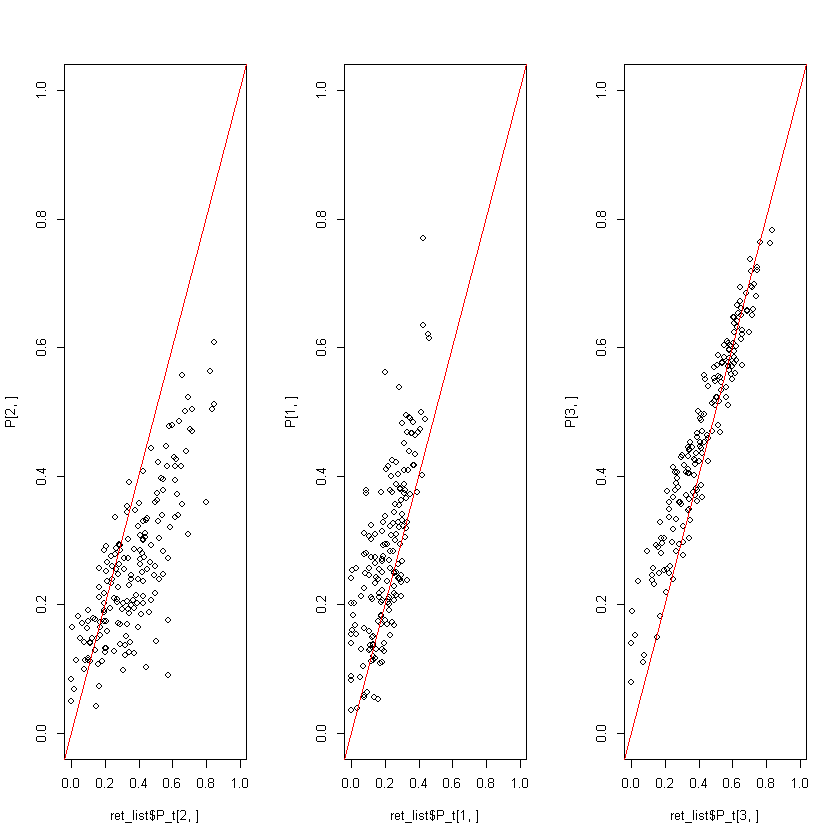

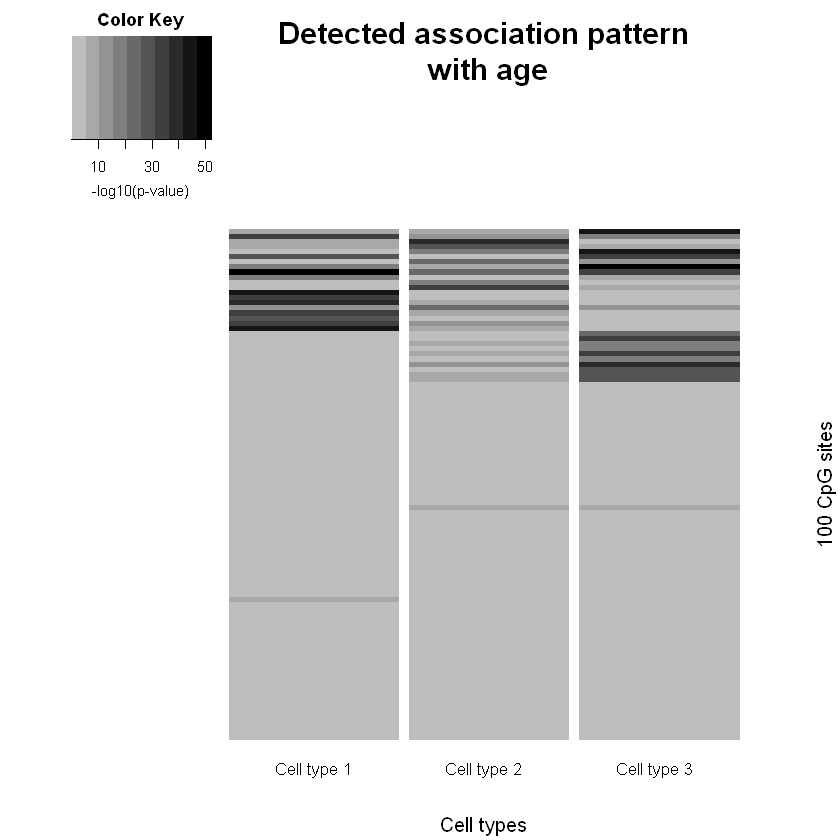

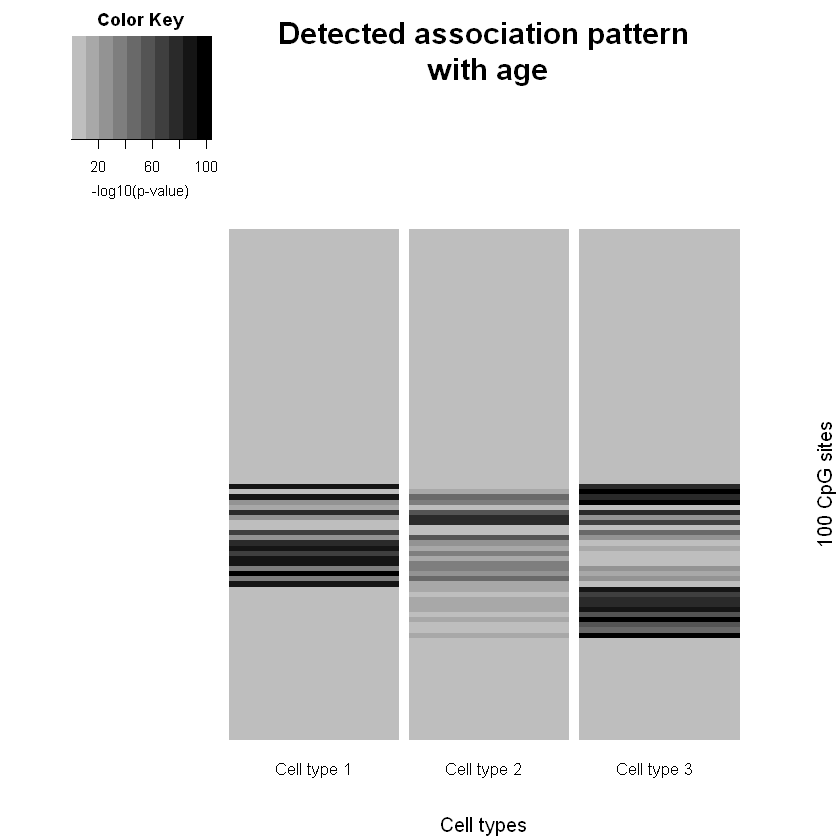

In [53]:
par(mfrow=c(1,3))
plot(ret_list$P_t[2, ], P[2, ], xlim=c(0,1), ylim=c(0,1))
abline(a=0, b=1, col="red")

plot(ret_list$P_t[1, ], P[1, ], xlim=c(0,1), ylim=c(0,1))
abline(a=0, b=1, col="red")

plot(ret_list$P_t[3, ], P[3, ], xlim=c(0,1), ylim=c(0,1))
abline(a=0, b=1, col="red")
riskCpGpattern(ret_list$pvalues[1:100, c(2,1,3)], 
		main_title="Detected association pattern\n with age", hc_row_ind = FALSE)
riskCpGpattern(ret_list$pvalues[1:100, K+c(2,1,3)], 
		main_title="Detected association pattern\n with age", hc_row_ind = FALSE)

In [32]:
help(HIRE)